In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
class ImageConcat:
    def __init__(self, n_h, n_v, resolution=1000):
        self.n_h = n_h
        self.n_v = n_v
        self.r = resolution
        self.img = Image.new("RGB", (self.n_h*self.r, self.n_v*self.r))
        self.cursor = [0,0]    
    
    def move_cursor_h(self):
        self.cursor[0] += self.r
        
    def move_cursor_v(self):
        self.cursor[1] += self.r
        
    def reset_cursor_h(self):
        self.cursor[0] = 0
        
    def append_img(self, path):
        try:
            self.img.paste(Image.open(path).convert('RGB'), tuple(self.cursor))
        except:
            print(f"Not Appended: {path}")
        
    def save_img(self, path):
        self.img.save(path)

In [37]:
import sys
import importlib

def call_module(nm, path):
    spec = importlib.util.spec_from_file_location(nm, path)
    foo = importlib.util.module_from_spec(spec)
    sys.modules[nm] = foo
    spec.loader.exec_module(foo)
    return foo

In [45]:
module = call_module('args', "/home/jupyter/ai_font/experiments/sample/args.py")
args = module.SampleArgs()

In [52]:
args.seens_ids

[1288,
 3164,
 4228,
 6832,
 8792,
 9632,
 10948,
 57,
 2107,
 3724,
 5768,
 7112,
 9012,
 10526,
 1241,
 2971,
 4301,
 6965,
 8739,
 9755,
 10649]

In [192]:
model_type = "letterstrip_fontdiffuser_training_phase_1"
datafd = "/home/jupyter/ai_font/data/zipfiles/raw/size96"
reportfd = "/home/jupyter/ai_font/data/report"

In [218]:
font = args.test_fonts[0]
contents = args.unseens_ids
c = contents[12]
s = 'unseen'

In [219]:
real = f"{datafd}/{s}/{font}__{c}.png"

In [220]:
real

'/home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/twice dahyun_4__9545.png'

In [221]:
files = [f"{reportfd}/{f}" for f in os.listdir(reportfd) if (f"c{c}" in f) & (font in f) & (model_type in f)]

In [222]:
bigimg = ImageConcat(n_h=10, n_v=12, resolution=100)
bigimg.append_img(real)
bigimg.reset_cursor_h()
bigimg.move_cursor_v()
bigimg.move_cursor_v()
cursori = 0
for _ in range(10):
    for _ in range(10):
        try:
            bigimg.append_img(files[cursori])
            bigimg.move_cursor_h()
            cursori += 1
        except:
            pass
    bigimg.reset_cursor_h()
    bigimg.move_cursor_v()

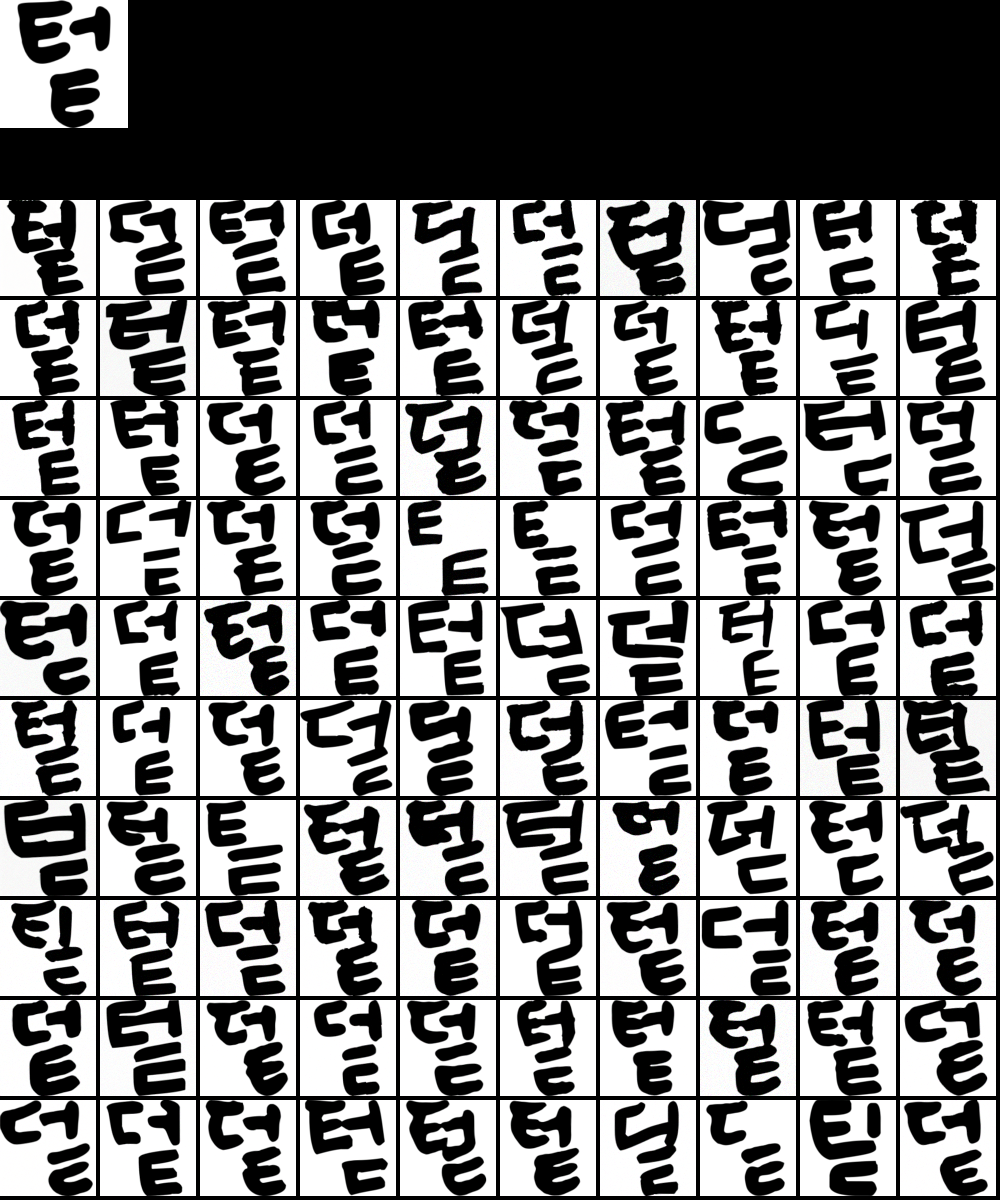

In [223]:
bigimg.img

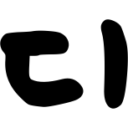

In [205]:
Image.open(real)

In [ ]:
bigimg = ImageConcat(n_h=10, n_v=11, resolution=100)
for font in fonts:
    contents = np.unique([f.split("_c")[1].split("_s")[0] for f in os.listdir(reportfd) if (".png" in f) & (font in f)])
    for c in contents:
        s = [f.split("__")[1] for f in os.listdir(reportfd) if (".png" in f) & (font in f) & (c in f)][0]
        # Seen True
        bigimg.append_img(f"{data_fd}/{s}/{font}__{c}.png")
        bigimg.reset_cursor_h()
        bigimg.move_cursor_v()
        
        # Seen Generated
        
        bigimg.move_cursor_h()
        # Unseen True
        bigimg.append_img(f"{args.data_fd}/unseen/{font}__{usi}.png")
        bigimg.move_cursor_h()
        # Unseen Generated
        bigimg.move_cursor_h()
        # go down
    bigimg.reset_cursor_h()
    bigimg.move_cursor_v()
bigimg.img